In [128]:
import pandas as pd
import numpy as np 
data = pd.read_csv("/Users/lipikas/Downloads/project-data.csv", sep=';')
data.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [129]:
data.dtypes

category                        object
age                              int64
sex                             object
albumin                        float64
alkaline_phosphatase           float64
alanine_aminotransferase       float64
aspartate_aminotransferase     float64
bilirubin                      float64
cholinesterase                 float64
cholesterol                    float64
creatinina                     float64
gamma_glutamyl_transferase     float64
protein                         object
dtype: object

In [130]:
data.shape

(615, 13)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      614 non-null    float64
 4   alkaline_phosphatase         597 non-null    float64
 5   alanine_aminotransferase     614 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  605 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    object 
dtypes: float64(9), int64

In [132]:
data.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '],
      dtype='object')

In [133]:
#Rename the columns by removing the extra spaces
data = data.rename({'gamma_glutamyl_transferase ':'gamma_glutamyl_transferase'}, axis=1)
data = data.rename({'protein   ':'protein'}, axis=1)

In [134]:
data.describe()

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000


<Axes: >

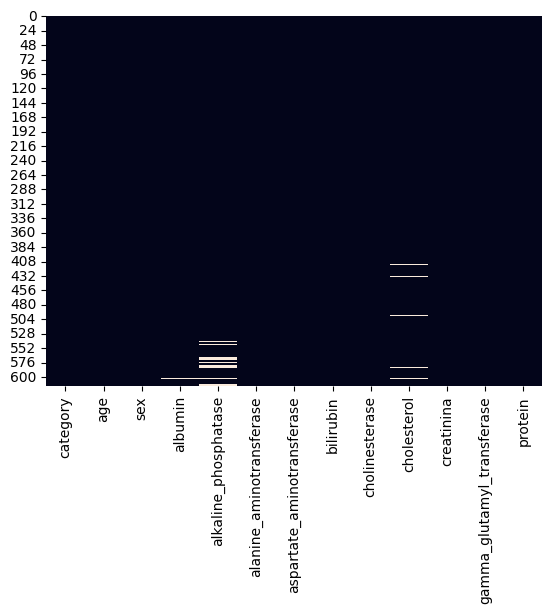

In [135]:

#Missing values and Imputation
import seaborn as sns
cols= data.columns
sns.heatmap(data[cols].isnull(), cbar=False)

In [136]:
data.isnull().sum()

category                       0
age                            0
sex                            0
albumin                        1
alkaline_phosphatase          18
alanine_aminotransferase       1
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                   10
creatinina                     0
gamma_glutamyl_transferase     0
protein                        0
dtype: int64

In [137]:
# Replace 'NA' strings with NaN
data.replace('NA', pd.NA, inplace=True)

#Mean Imputation
data['albumin'] = data['albumin'].fillna(data['albumin'].mean())
data['alkaline_phosphatase'] = data['alkaline_phosphatase'].fillna(data['alkaline_phosphatase'].mean())
data['alanine_aminotransferase'] = data['alanine_aminotransferase'].fillna(data['alanine_aminotransferase'].mean())
data['cholesterol'] = data['cholesterol'].fillna(data['cholesterol'].mean())
data['protein'] = data['protein'].fillna(data['cholesterol'].mean())

In [138]:
data.isnull().sum()

category                      0
age                           0
sex                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
dtype: int64

In [139]:
# Convert the column to numeric, coercing any non-convertible values to NaN
data['protein'] = pd.to_numeric(data['protein'], errors='coerce')

In [140]:
# One-Hot Encoding technique
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_data=pd.DataFrame(enc.fit_transform(data[['sex']]).toarray())
enc_data

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
610,1.0,0.0
611,1.0,0.0
612,1.0,0.0
613,1.0,0.0


In [141]:
# One-Hot Encoding technique
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assume 'data' is your original DataFrame
enc = OneHotEncoder(handle_unknown='ignore')
enc_data = pd.DataFrame(enc.fit_transform(data[['sex']]).toarray(), columns=enc.get_feature_names_out(['sex']))

# Concatenate the original data with the encoded columns
data = pd.concat([data.drop(columns=['sex']), enc_data], axis=1)

# Display the first few rows of the updated DataFrame
data.head()

,category,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein,sex_f,sex_m
0,no_disease,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0.0,1.0
1,no_disease,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0.0,1.0
2,no_disease,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0.0,1.0
3,no_disease,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0.0,1.0
4,no_disease,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0.0,1.0


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Define features (X) and target variable (y)
X = data.drop(['category'], axis=1) 
print(X)
X['protein'] = X['protein'].fillna(X['protein'].mean())
X.info()

label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])
y = data['category']
print(y)
# Create a dictionary to show the mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print(label_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
Log_model = LogisticRegression(max_iter=1000)
Log_model.fit(X_train, y_train)

     age  albumin  alkaline_phosphatase  alanine_aminotransferase  \
0     32     38.5              52.50000                       7.7   
1     32     38.5              70.30000                      18.0   
2     32     46.9              74.70000                      36.2   
3     32     43.2              52.00000                      30.6   
4     32     39.2              74.10000                      32.6   
..   ...      ...                   ...                       ...   
610   62     32.0             416.60000                       5.9   
611   64     24.0             102.80000                       2.9   
612   64     29.0              87.30000                       3.5   
613   46     33.0              68.28392                      39.0   
614   59     36.0              68.28392                     100.0   

     aspartate_aminotransferase  bilirubin  cholinesterase  cholesterol  \
0                          22.1        7.5            6.93         3.23   
1                    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [143]:
# Predictions on the test set
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.8618
Precision: 0.8961
Recall: 0.8618
F1-Score: 0.8559


In [144]:
from sklearn.metrics import confusion_matrix

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[ 4  0  0  2  3]
 [ 0  3  0  3  0]
 [ 0  3  3  2  1]
 [ 0  0  0 94  2]
 [ 0  0  0  1  2]]


In [145]:


# Sample data for prediction
sample_data = pd.DataFrame({
    'age': [47],
    'albumin': [22.5],
    'alkaline_phosphatase': [124],
    'alanine_aminotransferase': [79.5],
    'aspartate_aminotransferase': [46.7],
    'bilirubin': [2.3],
    'cholinesterase': [6.83],
    'cholesterol': [4.3],
    'creatinina': [170],
    'gamma_glutamyl_transferase': [345.6],
    'protein': [58.6],
    'sex_f': [0.0],
    'sex_m': [1.0]
})

# Make predictions
sample_prediction_encoded = Log_model.predict(sample_data)
sample_prediction = label_encoder.inverse_transform(sample_prediction_encoded)

print("Prediction for the sample data:", sample_prediction)


Prediction for the sample data: ['suspect_disease']


In [146]:
# Sample data for prediction
sample_data = pd.DataFrame({
    'age': [68],
    'albumin': [43],
    'alkaline_phosphatase': [22.9],
    'alanine_aminotransferase': [5],
    'aspartate_aminotransferase': [42.1],
    'bilirubin': [12],
    'cholinesterase': [7.29],
    'cholesterol': [4.89],
    'creatinina': [80.9],
    'gamma_glutamyl_transferase': [11.9],
    'protein': [76.1],
    'sex_f': [1.0],
    'sex_m': [0.0]
})

# Make predictions
sample_prediction_encoded = Log_model.predict(sample_data)
sample_prediction = label_encoder.inverse_transform(sample_prediction_encoded)

print("Prediction for the sample data:", sample_prediction)

Prediction for the sample data: [' fibrosis']


In [149]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assume `data` is your DataFrame that includes the target column 'category' and all features
# Define features (X) and target variable (y)
X = data.drop(['category'], axis=1)
X['protein'] = X['protein'].fillna(X['protein'].mean())

# Encode the target variable
label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])
y = data['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
Log_model = LogisticRegression(max_iter=1000)
Log_model.fit(X_train, y_train)

# Save the Logistic Regression model and LabelEncoder as pickle files
with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(Log_model, file)

with open("label_encoder.pkl", "wb") as file:
    pickle.dump(label_encoder, file)

# Prediction sample data
sample_data = pd.DataFrame({
    'age': [68],
    'albumin': [43],
    'alkaline_phosphatase': [22.9],
    'alanine_aminotransferase': [5],
    'aspartate_aminotransferase': [42.1],
    'bilirubin': [12],
    'cholinesterase': [7.29],
    'cholesterol': [4.89],
    'creatinina': [80.9],
    'gamma_glutamyl_transferase': [11.9],
    'protein': [76.1],
    'sex_f': [1.0],
    'sex_m': [0.0]
})

# Make predictions with the saved model
with open("logistic_regression_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

with open("label_encoder.pkl", "rb") as file:
    loaded_label_encoder = pickle.load(file)

# Predict category for sample data
sample_prediction_encoded = loaded_model.predict(sample_data)
sample_prediction = loaded_label_encoder.inverse_transform(sample_prediction_encoded)

print("Prediction for the sample data:", sample_prediction)


Prediction for the sample data: [1]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
